<span style='font-size:20px'>

# Using Classification Algorithms to Solve the MNIST Handwritten Numbers dataset

</span>

---

<span style='font-size:22px'>This code was written by **Edmar Junyor Bevilaqua**, if you want to know a little more about me, feel free to visit my social media:</span>
* <a href="https://www.linkedin.com/in/edmar-bevilaqua/"><span style='font-size:22px'>LinkedIn</span></a>
* <a href="https://github.com/edmar-bevilaqua"><span style='font-size:22px'>GitHub</span></a>
* <a href="https://www.instagram.com/edmar_bevilaqua/"><span style='font-size:22px'>Instagram</span></a>

---

<span style='font-size:25px'><strong>Note:</strong></span><br>
<span style='font-size:20px'>Most of the content you will see in this repository is based on projects I developed while learning Data Science, so if you want a more detailed and technical content, you can check the following books that I used to learn:</span><br>
* <span style='font-size:20px'><i>"Hands-On Machine Learning with Scikit-Learn, Keras &amp; TensorFlow"</i>, written by <a href="https://github.com/ageron"><strong>Aurélien Géron</strong></a> and published by <a href="https://www.oreilly.com/"><strong>O'Reilly</strong></a></span>. <br><br>
* <span style='font-size:20px'><i>"Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Jupyter"</i>, written by <a href="https://github.com/wesm"><strong>Wes McKinney</strong></a> and published by <a href="https://www.oreilly.com/"><strong>O'Reilly</strong></a></span>. <br><br>
* <span style='font-size:20px'><i>"Aprendizado de Máquina - Uma Abordagem Estatística"</i>, written by <a href="https://github.com/rizbicki"><strong>Rafael Izbicki</strong></a> and <a href="https://tiagoms.com/"><strong>Tiago Mendonça dos Santos</strong></a> and published by <a href="https://loja.uiclap.com/titulo/ua24032/"><strong>UICLAP</strong></a></span>. <br>

<span style='font-size:20px'>Those books inspired me to learn more and more about Data Science.</span>
<br>

<br>

<span style='font-size:20px'>As said in the title of this Notebook, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the <a href="https://www.census.gov/"><strong>US Census Bureau</strong></a>. Each image is labeled with the digit it represents.<br><br>
    This set has been studied so much that it is often called the “hello world” of Machine Learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns Machine Learning tackles this dataset sooner or later.</span>

# Importing the Dataset
---
<span style='font-size:20px'>This dataset is so famous that it is available inside the Scikit-Learn library:</span>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False) # The _784 is because this dataset is composed of 784 features (28 x 28 = 784 pixels images).
mnist.keys() # By default Scikit-Learn caches downloaded datasets in a directory called $HOME/scikit_learn_data.

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<br>
<span style='font-size:25px'><strong>Note:</strong></span>

<br>

<span style='font-size:20px'>Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including the following:</span>
<br>
* <span style='font-size:20px'>A DESCR key describing the dataset;</span>

* <span style='font-size:20px'>A data key containing an array with one row per instance and one column per feature;</span>

* <span style='font-size:20px'>A target key containing an array with the labels.</span>

<br>

In [2]:
print(mnist.DESCR) # Note from the creators:

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist['data']
y = mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<br>

<span style='font-size:20px'>
    There are 70,000 images in this dataset, each containing 784 features.<br>
    This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:
</span><br><br>

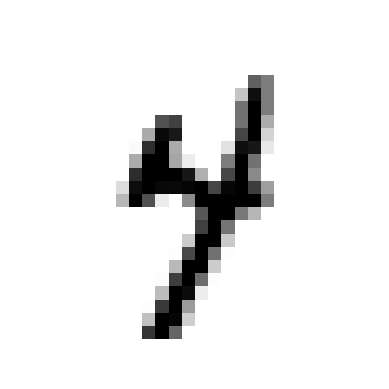

Target Value: 4


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

digit_number = np.random.randint(low=0, high=70000)
digit = X[digit_number]
plot_digit(digit)
plt.show()
print(f'Target Value: {y[digit_number]}')

In [5]:
print(f'Type of target value: {type(y[0])}') # Most ML expect numbers, so lets change the type of our target array.

y = y.astype(np.uint8)

Type of target value: <class 'str'>



---

<span style='font-size:25px'>
    Ploting a quick view of the first 25 digits in our dataset to demonstrate the complexity:
</span>

---
<br>

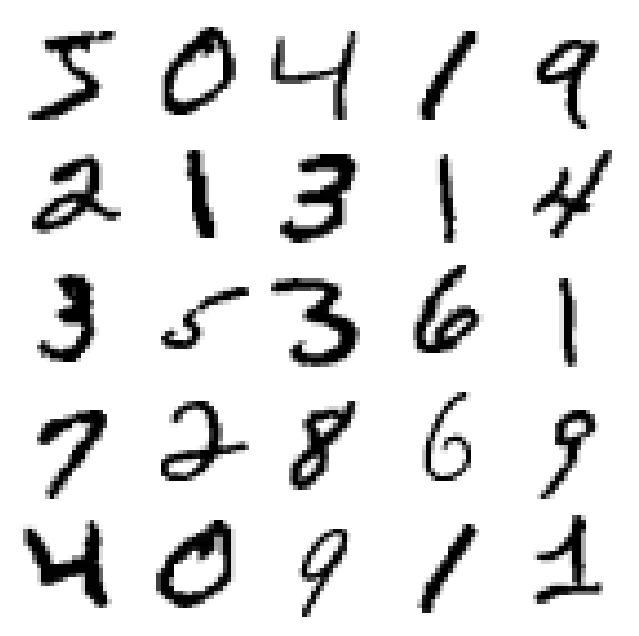

In [6]:
plt.figure(figsize=(8, 8))
for idx, image_data in enumerate(X[:25]):
    plt.subplot(5, 5, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

<span style='font-size:25px'>
    
# Splitting the set into Train and Test:
    
</span>

---

<span style='font-size:20px'>
    Hopefully, as we imported this set from Scikit-Learn library, it is already splitted:<br>
    The first 60,000 rows are for the training set, and the last 10,000 rows are for the test set.<br>
    Don't worry, the data is already shuffled and the test set is representative (contains approximately the same amount of each digit).
</span>
<br><br>

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Because some of the algorithms are very costly to proccess, we can reduce this dataset
# X_train, X_test, y_train, y_test = X[50000:60000], X[60000:63000], y[50000:60000], y[60000:63000]

<span style='font-size:22px'>
    
## Starting with a very simple classifier
    
</span>

---

<span style='font-size:20px'>
    To keep it simple in the beggining of our notebook, let's choose a number (in this case my favorite number: <strong>7</strong> )<br>
    Lets call this the "<i>Ultra 7 Detector Machine</i>"
</span>
<br><br>

In [8]:
# Code adaptation to consider only the target = 7 as True.

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [9]:
from sklearn.linear_model import SGDClassifier # SGD stands for "Stocastic Gradient Descent", which is a type for the loss function

model_sgd = SGDClassifier(random_state=101)
model_sgd.fit(X_train, y_train_7)

SGDClassifier(random_state=101)

<br>

---

<span style='font-size:20px'>
    Let's see how is his performance:
</span>

---

<br>

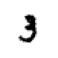

[False]



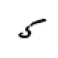

[False]



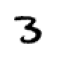

[False]



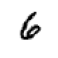

[False]



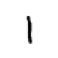

[False]



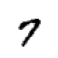

[ True]



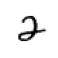

[False]



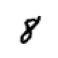

[False]



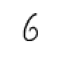

[False]



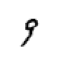

[ True]



In [10]:
for i in range(10, 20, 1):
    digit = X[i]
    plt.figure(figsize=(0.5,0.5))
    plot_digit(digit)
    plt.show()
    print(model_sgd.predict(digit.reshape(1,-1)), end='\n\n')

<br>

<span style='font-size:20px'>
    As we can see in the above output, the model said that the only number 7 plotted was True, which is correct, but the model also detected the last plot (number 9) as True, which is an error!
</span>
<br>
<br>

<span style='font-size:25px'>

# Measuring the Performance of Classification Models
    
</span>

---

<span style='font-size:20px'>
    Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend some time on this topic. There are many performance measures available, let's discuss about some new concepts and acronyms!
</span>
<br>
<br>
<br>

<span style='font-size:20px'>

## Measuring Accuracy Using Cross-Validation
    
</span>

---

<span style='font-size:20px'>
    We can use the Scikit-Learn cross-validation
</span>
<br>
<br>

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_sgd, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.9761, 0.9785, 0.9758])

<br>
<span style='font-size:20px'>
    Nice, all the 3 folds from Cross-validadtion was at least 97% accuracy, thas very good right?<br>
    Well, it depends. Let's try something different. Let's create a model that always say that the number is not 7 (The classifier returns False for everything!)
</span>
<br>
<br>

In [12]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator): # This class doesn't need the __init__ method because it don't have any hyperparameter
    def fit(self, X, y=None): # y=None for compatibility
        return self # The model does nothing!
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # The model returns 0 for all predictions of X!

In [13]:
never_7 = Never7Classifier()
cross_val_score(never_7, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89535, 0.8984 , 0.893  ])

<br>
<span style='font-size:20px'>
    Hummmmmm, that's quite interesting, isn't it?<br>
    Even the dumbest of the models (always return False) get's at least 89% accuracy. This is simply because only about 10% of the images are 7s, so if you always guess that an image is not a 7, you will be right about 90% of the time.<br>
    This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others - In our case: 90% aren't a 7s and only 10% are 7s).
</span>
<br>
<br>

<span style='font-size:20px'>

## Confusion Matrix
    
</span>

---

<span style='font-size:20px'>
    A much better way to evaluate the performance of a classifier is to look at the confusion matrix.<br>The general idea is to count the number of times instances of class A were classified as class A or something else. For example, to know the number of times the classifier got it right or got confused.
</span>
<br>
<br>

In [14]:
from sklearn.model_selection import cross_val_predict # This method returns the predictions made on each test fold

y_train_predictions = cross_val_predict(model_sgd, X_train, y_train_7, cv=3)

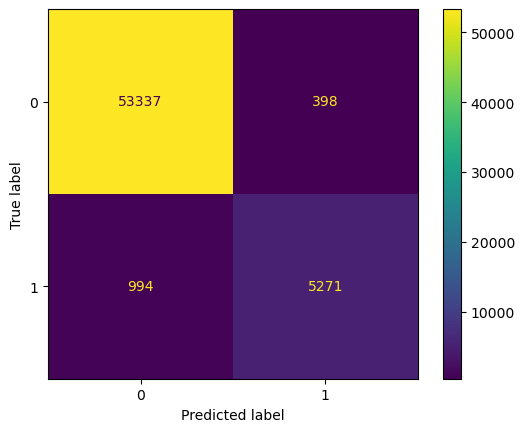

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
ConfusionMatrixDisplay(conf_matrix).plot()

<br>
<span style='font-size:20px'>
    Each row in a confusion matrix represents an actual class, while each column represents a predicted class.<br>
    The first row of this matrix considers non-7 images (the negative class): 53,337 of them were correctly classified as non-7s (they are called True Negatives - TN), while the remaining 398 were wrongly classified as 7s (False Positives - FP).<br> The second row considers the images of 7s (the positive class): 994 were wrongly classified as non-7s (False Negatives - FN), while the remaining 5,271 were correctly classified as 7s (True Positives - TP). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):
</span>
<br>
<br>

<br>

---

<span style='font-size:20px'>
    Simulating a perfect classifier:
</span>

---

<br>

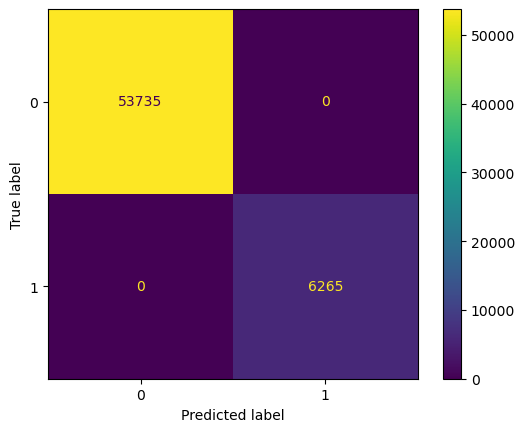

In [16]:
conf_matrix = confusion_matrix(y_train_7, y_train_7) # Pretending that both the prediction and the true label are equal!
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

<span style='font-size:20px'>

### Precision
    
</span>

---

<span style='font-size:20px'>
    Precision is the accuracy of the positive predictions from the classifier<br>
    It is defined by: Precision = TP / (TP + FP)
</span>
<br>
<br>


In [17]:
conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
print(precision)

0.929793614394073


<br>
<br>
<span style='font-size:20px'>

### Recall
    
</span>

---

<span style='font-size:20px'>
    Also called <i>sensitivity</i> or the True Positive Rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier<br>
    It is defined by: Recall = TP / (TP + FN)
</span>
<br>
<br>


In [18]:
conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
print(recall)

0.841340782122905


<br>

<span style='font-size:20px'>
    Scikit-Learn has methods to rapidly calculate these metrics:
</span>
<br>
<br>


In [19]:
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train_7, y_train_predictions)}')
print(f'Recall: {recall_score(y_train_7, y_train_predictions)}')

Precision: 0.929793614394073
Recall: 0.841340782122905


<br>
<br>
<span style='font-size:20px'>

### F<sub>1</sub> Measure
    
</span>

---

<span style='font-size:20px'>
    It is often convenient to combine precision and recall into a single metric called the F<sub>1</sub>-score, in particular if you need a simple way to compare two classifiers. The F<sub>1</sub>-score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F<sub>1</sub>-score if both recall and precision are high.
</span>
<br>
<br>


In [20]:
from sklearn.metrics import f1_score

print(f'F1-Score: {f1_score(y_train_7, y_train_predictions)}')

F1-Score: 0.8833584715937657


<br>
<br>
<span style='font-size:20px'>

### Precision / Recall Trade-off
    
</span>

---

<span style='font-size:20px'>
    To understand this trade-off, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold (The SGDClassifier uses a threshold equal to 0), it assigns the instance to the positive class, otherwise it assigns it to the negative class.<br>
    Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:
</span>
<br>
<br>


[73.19563852]
Is it a 7? [ True]


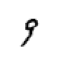

In [21]:
score = model_sgd.decision_function([digit])
threshold = 0
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(digit)
plt.show()

<br>

<span style='font-size:20px'>
    As we can see above, the classifier was wrong, the number in this case was a 9, so it should've returned "False".<br>
    If we increase his threshold, to a higher number, let's say 1000, let's see whats happens:
</span>
<br>
<br>

[73.19563852]
Is it a 7? [False]


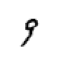

In [22]:
score = model_sgd.decision_function([digit])
threshold = 1000
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(digit)
plt.show()

<br>

<span style='font-size:20px'>
    As expected, now the classifier will say that this is not a 7, increasing it's precision. But because we increased the threshold, we also decreased the recall of our classifiers, because now even if we have a 7 with the a threshold below 1000, it will return False.
</span>
<br>
<br>

[-3102.50473041]
Is it a 7? [False]


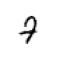

In [23]:
a_seven = X[148]
score = model_sgd.decision_function([a_seven])
threshold = 1000
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(a_seven)
plt.show()

<br>

<span style='font-size:20px'>
    In the above output, we clearly have a 7:
</span>
<br>
<br>

<br>
<br>
<span style='font-size:20px'>

### How to Decide Which Threshold To Use?
    
</span>

---

<span style='font-size:20px'>
    First, let's use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions<br>
    With these scores, let's use the precision_recall_curve() function to compute precision and recall for all possible thresholds<br>
    Finally, use Matplotlib to plot precision and recall as functions of the threshold value:
</span>
<br>
<br>


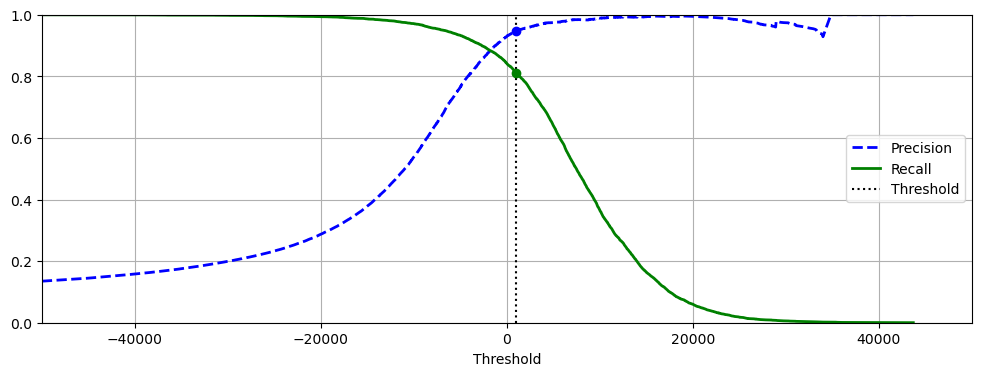

In [24]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(model_sgd, X_train, y_train_7, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores) # This method can be unwrapped into 3 variables: precisions, recalls, thresholds.

plt.figure(figsize=(12, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

<br>
<br>

<span style='font-size:25px'><strong>How do we interpretate that?</strong></span>

<span style='font-size:20px'>
The precision-recall curve illustrates the tradeoff between precision and recall for different thresholds. Here’s what it reveals:
</span>
<br>

* <span style='font-size:20px'>A high area under the curve (AUC) represents both high recall and high precision. High precision corresponds to a low false positive rate, while high recall corresponds to a low false negative rate.</span>
* <span style='font-size:20px'>If a system has high recall but low precision, it returns many results, but most of its predicted labels are incorrect compared to the training labels.</span>
* <span style='font-size:20px'>Conversely, if a system has high precision but low recall, it returns very few results, but most of its predicted labels are correct compared to the training labels.</span>
* <span style='font-size:20px'>An ideal system achieves both high precision and high recall, correctly labeling many results.</span>
<br>
<br>


<br>
<br>
<span style='font-size:20px'>
    Another way of seeing this is plotting the Recall x Precision curve:
</span>

---

<br>

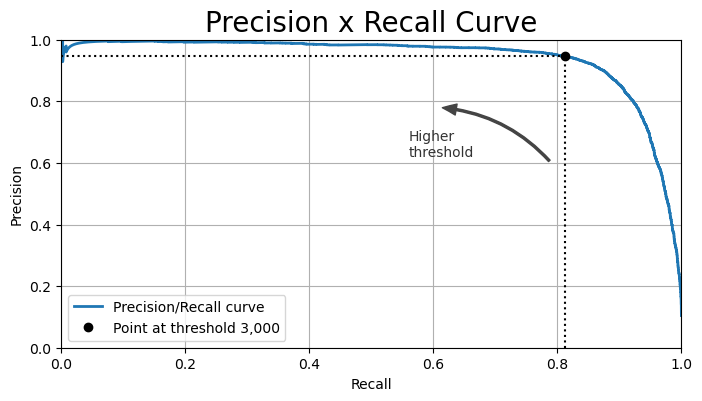

In [25]:
import matplotlib.patches as patches

plt.figure(figsize=(8, 4))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.title("Precision x Recall Curve", size=20)

plt.show()

<br>
<br>
<span style='font-size:20px'>

### The ROC Curve
    
</span>

---

<span style='font-size:20px'>

The **Receiver Operating Characteristic (ROC) curve** is a graphical representation used to evaluate the performance of a **classification model**, particularly in scenarios where the response variable is binary (e.g., positive/negative, true/false, yes/no).

Here's how it works:

1. **True Positive Rate (TPR)**: Also known as **sensitivity** or **recall**, this metric measures the proportion of actual positive cases correctly predicted by the model. In other words, it answers the question: "Of all the positive cases in the dataset, how many did the model correctly identify?"

2. **False Positive Rate (FPR)**: This metric represents the proportion of negative cases incorrectly predicted as positive by the model. It answers the question: "Of all the negative cases in the dataset, how many were falsely classified as positive?" - This metrics is calculater by 1 - TNR (True Negative Rate - aka _Specificity_)

The ROC curve is created by plotting pairs of TPR (sensitivity) against FPR for various decision thresholds of the classification model. Each point on the curve corresponds to a specific threshold. The curve visually illustrates the tradeoff between sensitivity and specificity (or 1 - FPR) across different threshold values.

Key points about the ROC curve:

- **AUC (Area Under the Curve)**: The area under the ROC curve quantifies the overall performance of the model. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5 (a diagonal line). The closer the AUC is to 1, the better the model's ability to distinguish between positive and negative cases.

- **Interpretation**: If the ROC curve hugs the top-left corner (i.e., TPR is high while keeping FPR low), the model performs well. Conversely, if the curve is close to the diagonal, the model's performance is no better than random guessing.

- **Model Comparison**: Calculating the AUC for multiple models allows us to compare their predictive abilities. The model with the highest AUC is considered the best at correctly classifying observations into categories.

Remember, the ROC curve provides valuable insights into a model's performance, especially when dealing with binary classification tasks.

</span>
<br>
<br>


In [26]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_train_7, y_score=y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, "b:",linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1])

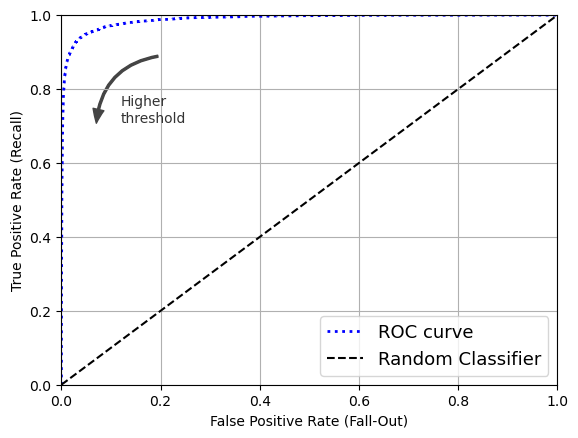

In [27]:
plot_roc_curve(false_positive_rate, true_positive_rate, "ROC curve")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.legend(loc="lower right", fontsize=13)
plt.show()

<br>
<br>
<span style='font-size:20px'>

When deciding between the **ROC (Receiver Operating Characteristic) curve** and the **PR (Precision-Recall) curve**, consider the following guidelines:

1. **Imbalanced Data**:
   - **PR Curve**: Prefer the PR curve when dealing with imbalanced datasets, especially when the positive class is rare. The PR curve focuses exclusively on the positive class and considers correct predictions of the negative class. It provides valuable insights into model performance in such scenarios⁴.
   - **ROC Curve**: The ROC curve measures both the ability of the model to correctly classify positive examples and its ability to minimize false positive errors. It is suitable for balanced datasets or when the class distribution is not highly skewed³.

2. **Tradeoff Between False Positives and False Negatives**:
   - **PR Curve**: If you care more about minimizing false positives (e.g., avoiding false alarms) than false negatives (missing true positives), choose the PR curve. It directly shows the tradeoff between precision and recall, allowing you to set an appropriate threshold².
   - **ROC Curve**: If you want to evaluate overall model performance without a specific emphasis on false positives or false negatives, the ROC curve provides a broader view of the tradeoff between true positive rate (sensitivity) and false positive rate¹.

3. **Context and Priorities**:
   - Consider the context of your problem and the relative importance of precision and recall. For instance:
     - In medical diagnosis, missing a disease (false negatives) may be more critical than false alarms (false positives).
     - In fraud detection, minimizing false positives (avoiding false accusations) is crucial.
     - In anomaly detection, a high recall (finding most anomalies) might be more important.
   - Choose the curve that aligns with your priorities.

Remember that both curves provide valuable information about classifier performance. The choice depends on your specific use case, dataset characteristics, and the balance between precision and recall

</span>
<br>
<br>


<span style='font-size:20px'>

## Using Another Classifier
    
</span>

---

<span style='font-size:20px'>

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier.<br>
First, you need to get scores for each instance in the training set. But due to the way it works, the RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 7):

</span>
<br>

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rnd_forest_clf = RandomForestClassifier(random_state=101)
y_proba_rnd_forest = cross_val_predict(rnd_forest_clf, X_train, y_train_7, cv=3, method='predict_proba')
display(pd.DataFrame(data=y_proba_rnd_forest, columns=["Prob. of not being a 7", "Prob. of being a 7"]))

,Prob. of not being a 7,Prob. of being a 7
0,0.97,0.03
1,1.00,0.00
2,0.88,0.12
3,1.00,0.00
4,0.97,0.03
...,...,...
59995,1.00,0.00
59996,1.00,0.00
59997,0.98,0.02
59998,1.00,0.00


In [29]:
y_scores_rnd_forest = y_proba_rnd_forest[:, 1] # score = probability of positive class
false_positive_rate_forest, true_positive_rate_forest, thresholds_forest = roc_curve(y_train_7, y_scores_rnd_forest)

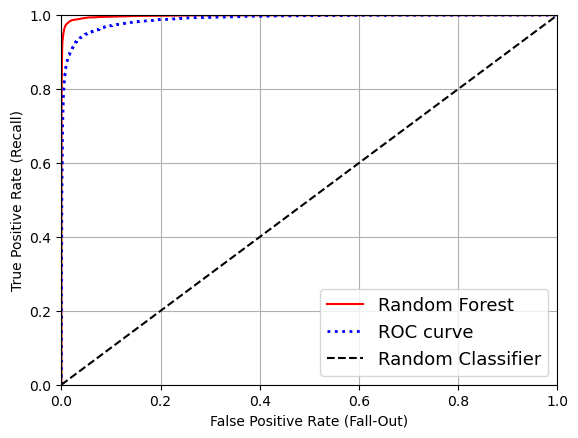

In [30]:
plt.plot(false_positive_rate_forest, true_positive_rate_forest, "r",label="Random Forest")
plot_roc_curve(false_positive_rate, true_positive_rate, "ROC curve")
plt.legend(loc="lower right", fontsize=13)
plt.show()

---

<span style='font-size:20px'>

the Random Forest classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC.

</span>
<br>

In [31]:
from sklearn.metrics import recall_score, precision_score

y_predictions = y_scores_rnd_forest >= 0.5
precision = precision_score(y_true=y_train_7, y_pred=y_predictions)
recall = recall_score(y_true=y_train_7, y_pred=y_predictions)

print(f'RandomForest Precision: {precision}')
print(f'RandomForest recall: {recall}')

RandomForest Precision: 0.9856177438918732
RandomForest recall: 0.9079010375099761


<br>
<br>
<br>

<span style='font-size:25px'>

# Multiclass Classification
    
</span>

---

<span style='font-size:20px'>
    
**Multiclass classification** is a type of **classification task** where the goal is to assign an input sample to one of several possible classes. Unlike binary classification (which involves only two classes), multiclass classification deals with more than two classes. Each sample is labeled as one specific class out of the available options.

For example, consider a scenario where we want to classify images of fruits into three categories: **orange**, **apple**, or **pear**. Each image corresponds to one sample, and the task is to predict which fruit category it belongs to. In this case, we have a multiclass classification problem with three classes.

Common algorithms used for multiclass classification include:

1. **Inherently Multiclass Algorithms**:
   - These algorithms natively support multiclass classification without any additional modifications. Some examples include:
     - **Naive Bayes (BernoulliNB)**
     - **Decision Trees (DecisionTreeClassifier)**
     - **Random Forests (ExtraTreesClassifier)**
     - **Gaussian Naive Bayes (GaussianNB)**
     - **K-Nearest Neighbors (KNeighborsClassifier)**
     - **Linear Discriminant Analysis (LinearDiscriminantAnalysis)**
     - **Support Vector Machines (SVM) with certain settings**
     - **Logistic Regression (LogisticRegression) with certain settings**
     - **Neural Networks (MLPClassifier)**
     - **Nearest Centroid (NearestCentroid)**
     - **Quadratic Discriminant Analysis (QuadraticDiscriminantAnalysis)**
   - These algorithms handle multiclass scenarios directly and do not require additional transformations.

2. **Multiclass as One-Vs-One (OvO)**:
   - In this approach, the problem is transformed into a set of binary classification problems. Each class is compared against every other class, resulting in a total of C(C-1)/2 binary classifiers (where C is the number of classes).
   - Examples of OvO algorithms:
     - **Support Vector Machines (SVM) with NuSVC or SVC**
     - **Gaussian Process Classifier (GaussianProcessClassifier) with specific settings**

3. **Multiclass as One-Vs-The-Rest (OvR or OvA)**:
   - In this strategy, each class is treated as the positive class, and the rest of the classes are grouped together as the negative class. Separate binary classifiers are trained for each class.
   - Examples of OvR algorithms:
     - **Gradient Boosting Classifier (GradientBoostingClassifier)**
     - **Gaussian Process Classifier (GaussianProcessClassifier) with specific settings**
     - **Support Vector Machines (SVM) with LinearSVC or LogisticRegression with specific settings**
     - **Stochastic Gradient Descent Classifier (SGDClassifier)**
     - **Perceptron (Perceptron)**
     - **Passive Aggressive Classifier (PassiveAggressiveClassifier)**

Remember that the choice of algorithm depends on the specific problem, dataset characteristics, and performance requirements. Multiclass classification allows us to handle complex scenarios with multiple classes, making it a fundamental task in machine learning.

</span>
<br>
<br>
<br>

<span style='font-size:25px'>

## Support Vector Machine (Support Vector Classifier)
    
</span>

---

<span style='font-size:20px'>
    
Let's start with the Support Vector Classifier from Scikit-Learn

</span>
<br>

In [32]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # Now with y_train, containing all the numbers from 0 to 9

SVC()

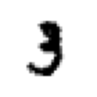

Predicted class: [3]



In [33]:
digit = X[10]
plt.figure(figsize=(1,1))
plot_digit(digit)
plt.show()
print(f"Predicted class: {svm_clf.predict([digit])}", end='\n\n')

<span style='font-size:20px'>
    
That was easy! This code trains the SVC on the training set using the original target classes from 0 to 9 (y_train), instead of the 7-versus-the-rest target classes (y_train_7). Then it makes a prediction (a correct one in this case). Under the hood, Scikit-Learn actually used the OvO (_one-versus-one_) strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels. If you call the decision_function() method, you will see that it returns 10 scores per instance (instead of just 1). That’s one score per class:

</span>
<br>

In [34]:
digit_scores = svm_clf.decision_function([digit])
print(digit_scores)

[[ 2.73719174  6.20651629  3.81372559  9.32009109  0.69223349  6.26207869
  -0.31019599  1.69984884  8.29382546  6.23989726]]


In [35]:
winner_class = np.argmax(digit_scores)
print(f'Winner Class Index: {winner_class}')
print(f'Classes: {svm_clf.classes_}')
print(f'Winner Class at index {winner_class}: {svm_clf.classes_[winner_class]}')

Winner Class Index: 3
Classes: [0 1 2 3 4 5 6 7 8 9]
Winner Class at index 3: 3


<br>

<span style='font-size:20px'>
    
If you want `decision_function()` to return all 45 scores, you can set the `decision_function_shape` hyperparameter to `"ovo"`. The default value is `"ovr"`, but don't let this confuse you: `SVC` always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

</span>

<br>

In [36]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
digit_scores_ovo = svm_clf.decision_function([digit])
digit_scores_ovo.round(2)

array([[-0.1 , -0.84, -2.48,  1.22, -1.26,  0.78,  0.81, -1.34, -0.53,
         0.67, -2.31,  1.08, -0.29,  1.54,  1.26, -0.64,  0.22, -3.12,
         1.22, -0.55,  1.73,  0.82, -1.53, -0.01,  2.75,  2.71,  3.13,
         3.06,  2.52,  2.09, -1.29,  0.04, -0.9 , -1.94, -1.67,  2.26,
         1.17, -0.07, -0.37, -0.46, -2.66, -0.8 , -1.64, -1.64,  0.14]])

<br>

<span style='font-size:20px'>
    
When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class 5), but in general you won’t be so lucky.<br><br>
If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC:

</span>

<br>

In [37]:
# from sklearn.multiclass import OneVsRestClassifier # This line of code takes to much time to run

# svm_ovr_clf = OneVsRestClassifier(SVC())
# svm_ovr_clf.fit(X_train, y_train)

In [38]:
# plt.figure(figsize=(1,1))
# plot_digit(digit)
# plt.show()
# print(f"Predicted class: {svm_ovr_clf.predict([digit])}", end='\n\n')

<br>
<br>
<br>

<span style='font-size:25px'>

## SGDClassifier for Multiclass
    
</span>

---

<span style='font-size:20px'>
    
This time Scikit-Learn did not have to run OvR or OvO because SGD classifiers can directly classify instances into multiple classes. The `decision_function()` method now returns one value per class. Let’s look at the score that the SGD classifier assigned to each class:

</span>
<br>

In [39]:
model_sgd.fit(X_train, y_train)

SGDClassifier(random_state=101)

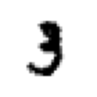

Predicted class: [3]



In [40]:
plt.figure(figsize=(1,1))
plot_digit(digit)
plt.show()
print(f"Predicted class: {model_sgd.predict([digit])}", end='\n\n')

In [41]:
model_sgd.decision_function([digit])

array([[-24989.80882484, -24235.21516272, -14912.11662661,
          6672.31750783, -23925.34720457,  -9151.7566625 ,
        -20653.33848906, -21248.64561505,  -7854.9790303 ,
         -7232.84556679]])

In [42]:
cross_val_score(model_sgd, X_train, y_train, cv=3, scoring='accuracy')

array([0.86515, 0.8742 , 0.8772 ])

In [43]:
print("teste")

teste
